In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
# code settings
pd.set_option('display.max_columns', None)

# visualization settings
plt.rc('figure', figsize=(6,6))
sns.set_style('darkgrid')

# setting seed state
np.random.seed(50)

In [58]:
dataset = load_wine()

In [59]:
# Splits the dataset into training and testing data
x = pd.DataFrame(dataset.data)
y = pd.DataFrame(dataset.target)

split = np.random.rand(len(dataset.data)) < 0.8

X_train, X_test = dataset.data[split], dataset.data[~split]
y_train, y_test = dataset.target[split], dataset.target[~split]

In [56]:
m_nb = MultinomialNB()

%time m_nb.fit(X_train, y_train)

ValueError: could not convert string to float: 'F'

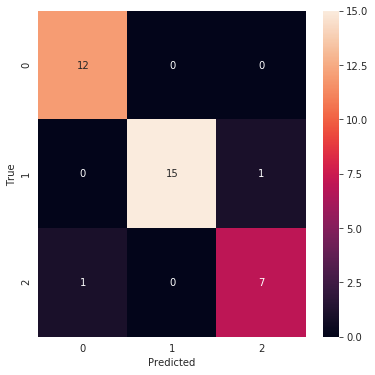

In [86]:
test = pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'])

sns.heatmap(test, annot=True)

In [104]:
# https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

print('Accuracy score: ', format(metrics.accuracy_score(y_test, pred)))
print('Precision score: ', format(metrics.precision_score(y_test, pred, average='micro')))
print('Recall score: ', format(metrics.recall_score(y_test, pred, average='micro')))
print('F1 score: ', format(metrics.f1_score(y_test, pred, average='micro')))

Accuracy score:  0.9444444444444444
Precision score:  0.9444444444444444
Recall score:  0.9444444444444444
F1 score:  0.9444444444444444


In [5]:
ab_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None)

In [8]:
ab_target = pd.DataFrame()

ab_target['age'] = pd.cut(ab_data.iloc[:,8], range(1, 29, 5))
ab_target['age'] = ab_target['age'].astype(str)

ab_features = ab_data.drop(ab_data.columns[8], axis=1)

In [9]:
ab_features.head(2)

,0,1,2,3,4,5,6,7
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07


In [10]:
ab_target_pro = ab_target.apply(LabelEncoder().fit_transform)

test = OneHotEncoder()

test.fit(ab_features)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [20]:
ab_features.dtypes

0     object
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
dtype: object

In [63]:
X_train, X_test, y_train, y_test = train_test_split(ab_features, ab_target_pro, test_size=0.2, random_state=50)

In [70]:
type(y_train)

pandas.core.frame.DataFrame

In [77]:
y_train.values

array([[4],
       [4],
       [4],
       ...,
       [4],
       [4],
       [4]])

In [80]:
X_train

,0,1,2,3,4,5,6,7
3840,F,0.530,0.410,0.145,0.8255,0.3750,0.2040,0.2450
3962,F,0.720,0.575,0.195,2.1505,1.0745,0.3820,0.5850
2227,I,0.275,0.200,0.075,0.0860,0.0305,0.0190,0.0300
216,M,0.450,0.350,0.130,0.4600,0.1740,0.1110,0.1350
2347,M,0.505,0.400,0.130,0.7640,0.3035,0.1890,0.2175
502,F,0.620,0.470,0.225,1.1150,0.3780,0.2145,0.3600
614,I,0.450,0.350,0.145,0.5250,0.2085,0.1000,0.1655
386,M,0.540,0.420,0.155,0.7385,0.3515,0.1520,0.2150
1071,I,0.385,0.290,0.080,0.2485,0.1220,0.0495,0.0650
3357,I,0.375,0.285,0.100,0.2390,0.1050,0.0555,0.0700


In [81]:
m_nb = MultinomialNB()

%time m_nb.fit(X_train, y_train)

ValueError: could not convert string to float: 'F'

Convert identity column in features to ints